# Simple EDA along with Time series Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas
from shapely.geometry import Point
import warnings
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import dates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

In [2]:
matplotlib.style.use('seaborn-v0_8-white')

In [3]:
df_food = pd.read_csv('../data/wfp_food_prices_ind.csv', skiprows=[1])

# Exploration Data Analysis

In [4]:
df_food.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1590
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9860
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163


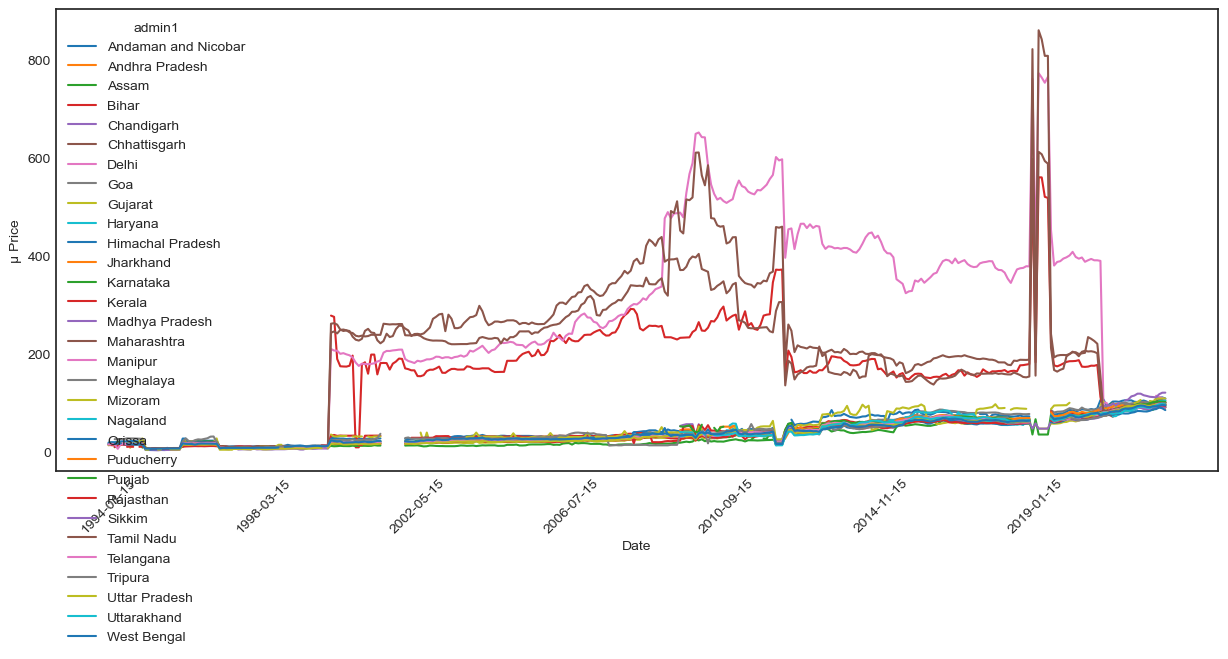

In [46]:
x = df_food[['date', 'admin1', 'price']].groupby(['date', 'admin1']).mean()
x.reset_index().pivot(index='date', columns='admin1', values='price').plot(figsize=(15, 6), rot=45, ylabel='µ Price', xlabel='Date');

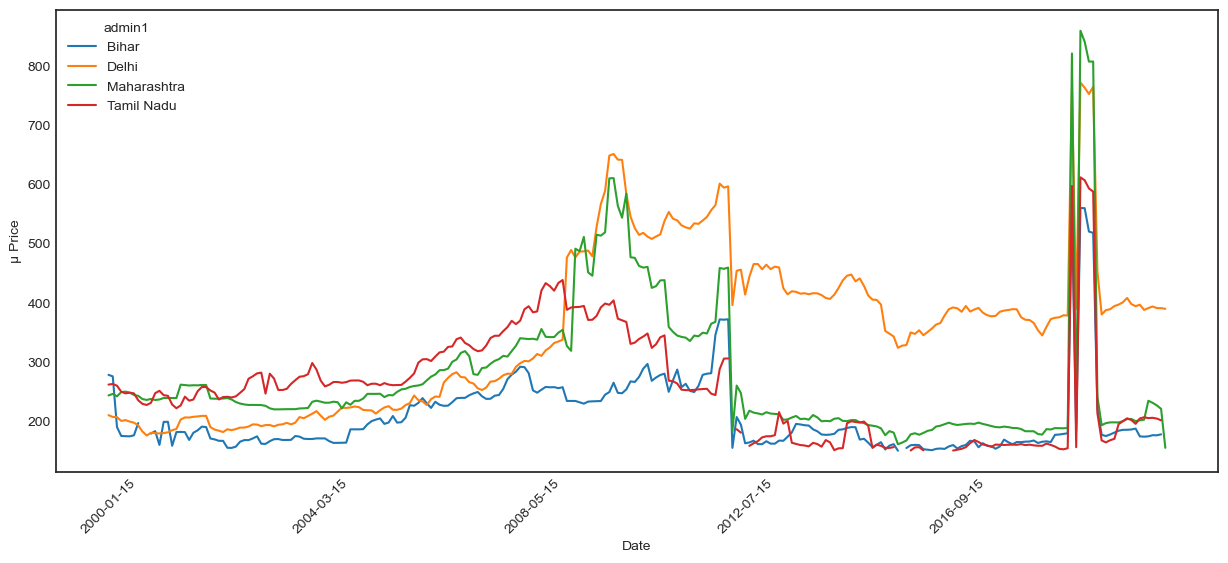

In [45]:
x = df_food[['date', 'admin1', 'price']].groupby(['date', 'admin1']).mean()
x = x[x.price > 150]
x = x.reset_index().pivot(index='date', columns='admin1', values='price')
x.plot(figsize=(15, 6), rot=45, ylabel='µ Price', xlabel='Date');

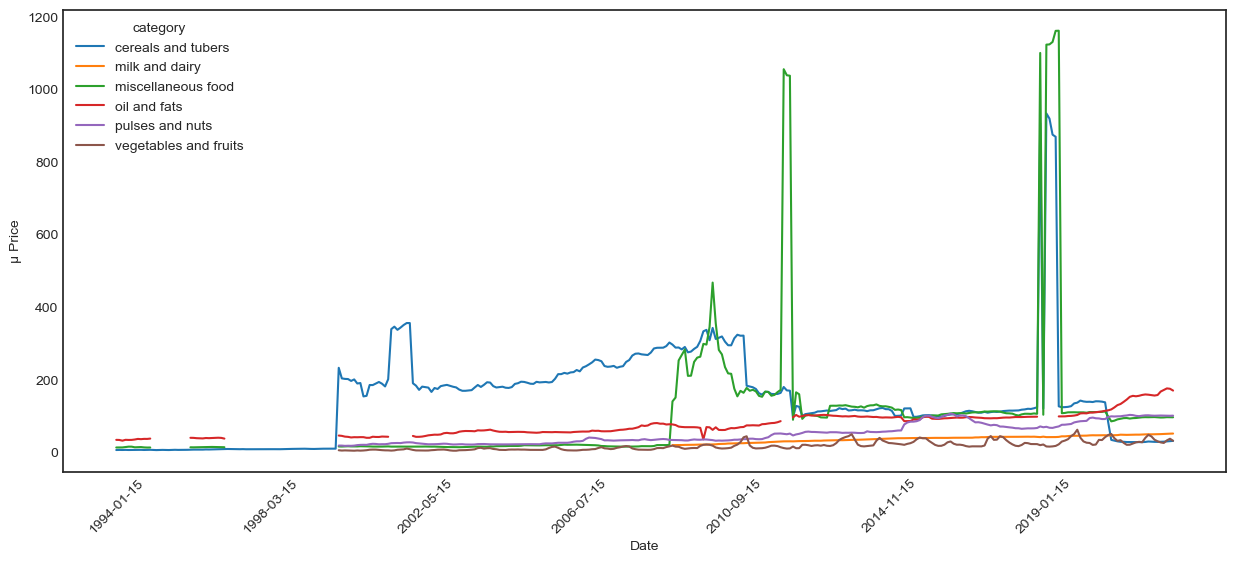

In [47]:
x = df_food[['date', 'category', 'price']].groupby(['date', 'category']).mean()
x.reset_index().pivot(index='date', columns='category', values='price').plot(figsize=(15, 6), rot=45, ylabel='µ Price', xlabel='Date');

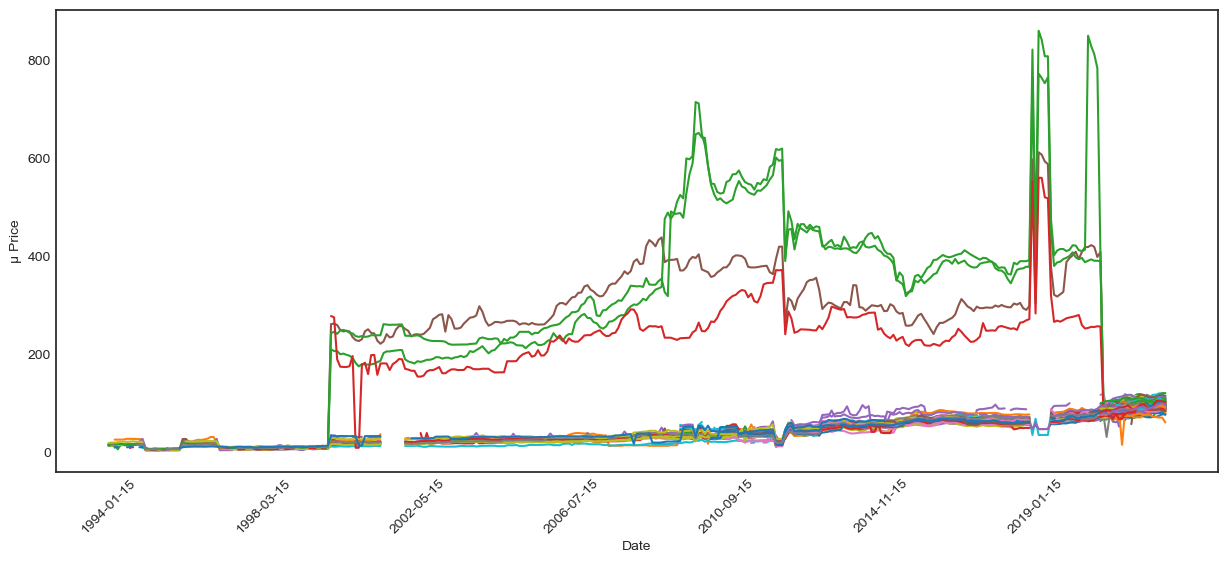

In [49]:
x = df_food[['date', 'market', 'price']].groupby(['date', 'market']).mean()
x.reset_index().pivot(index='date', columns='market', values='price').plot(figsize=(15, 6), rot=45, ylabel='µ Price', xlabel='Date', legend=False);

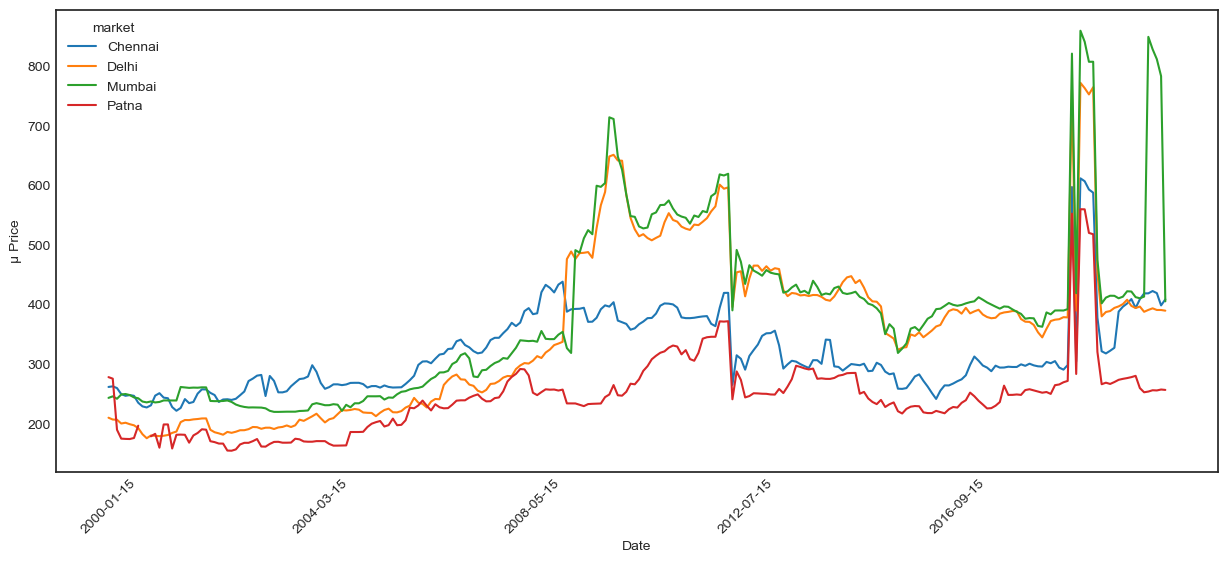

In [51]:
x = df_food[['date', 'market', 'price']].groupby(['date', 'market']).mean()
x = x[x.price > 150]
x = x.reset_index().pivot(index='date', columns='market', values='price')
x.plot(figsize=(15, 6), rot=45, ylabel='µ Price', xlabel='Date');

In [16]:
india_map = geopandas.read_file('../data/india_map')

In [209]:
india_geometry = geopandas.GeoDataFrame({
    'market': df_food['market'],
    'geometry': [Point(x, y) for x, y in zip(df_food['longitude'], df_food['latitude'])]
})

In [210]:
overlay_geom = india_map.overlay(india_geometry, how="union", keep_geom_type=False)

## Geometry

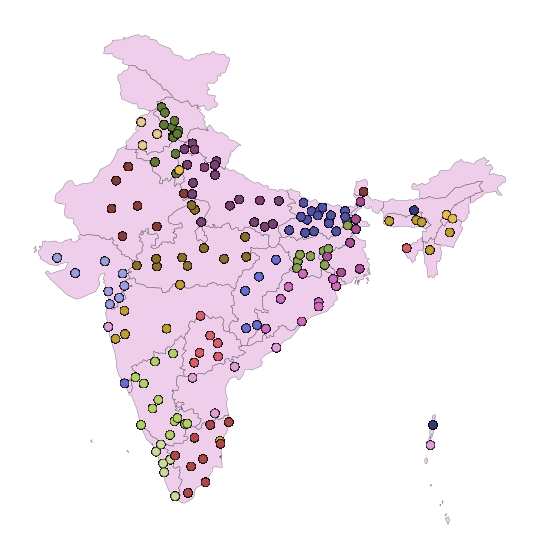

In [211]:
g1 = overlay_geom.plot(cmap='tab20b', edgecolor='k', alpha=0.5, linewidth=.3, figsize=(7,7))
g1.set_axis_off();

In [9]:
df_food.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1590
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9860
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163


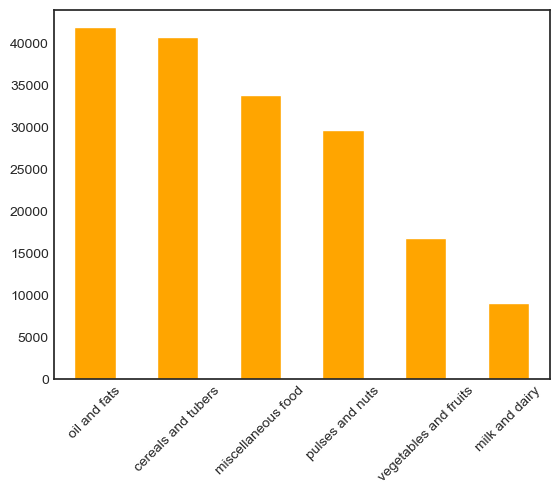

In [10]:
df_food.category.value_counts().plot(kind='bar', rot=45, color='orange');

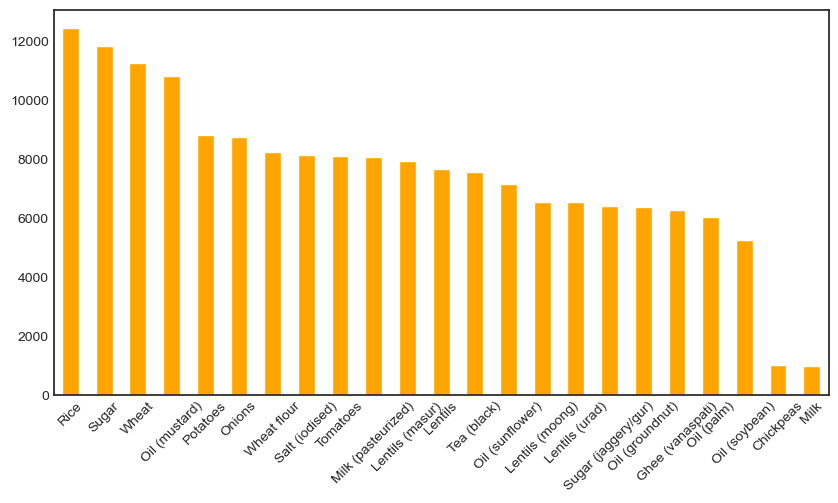

In [11]:
df_food.commodity.value_counts().plot(kind='bar', rot=45, figsize=(10,5), color='orange');

In [12]:
scatter_price = df_food.reset_index().rename(columns={'index':'id'})[['id', 'market', 'price']]

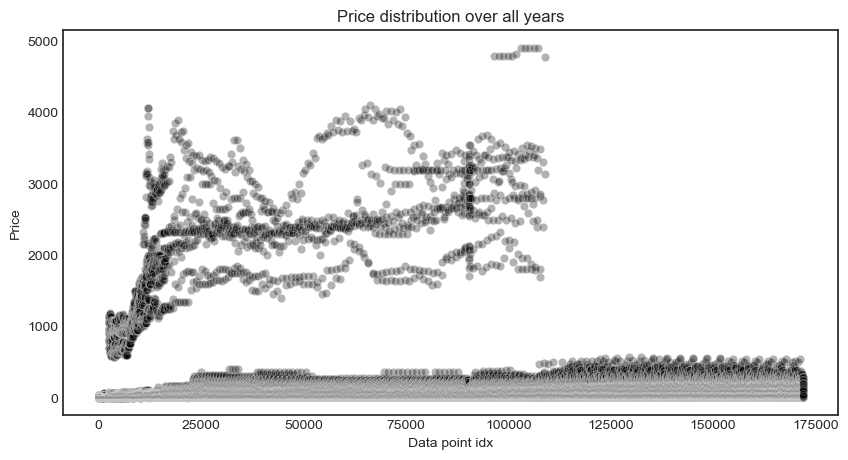

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 5))

g1 = sns.scatterplot(scatter_price, ax=ax1, x='id', y='price', color='k', alpha=.3, edgecolor='white', legend=False)
g1.set(xlabel ="Data point idx", ylabel='Price', title ='Price distribution over all years');

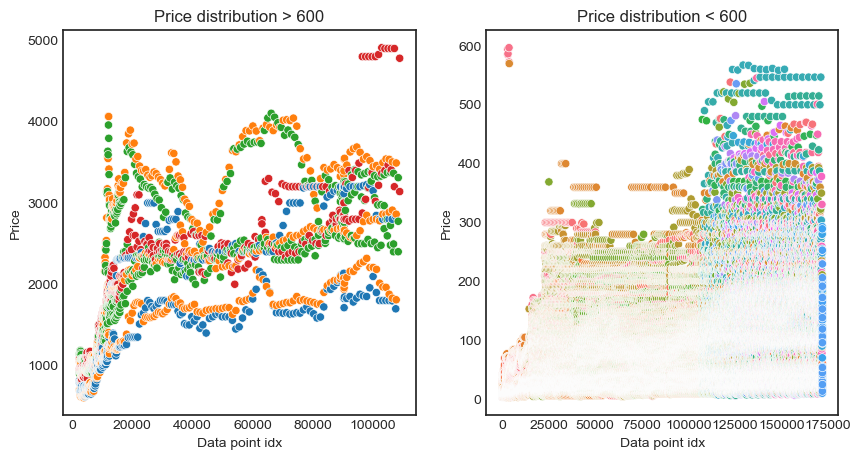

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

g1 = sns.scatterplot(scatter_price[scatter_price.price > 600], ax=ax[0], x='id', y='price', hue='market', legend=False)
g1.set(xlabel ="Data point idx", ylabel='Price', title ='Price distribution > 600')
g2 = sns.scatterplot(scatter_price[scatter_price.price < 600], ax=ax[1], x='id', y='price', hue='market', legend=False)
g2.set(xlabel ="Data point idx", ylabel='Price', title ='Price distribution < 600');

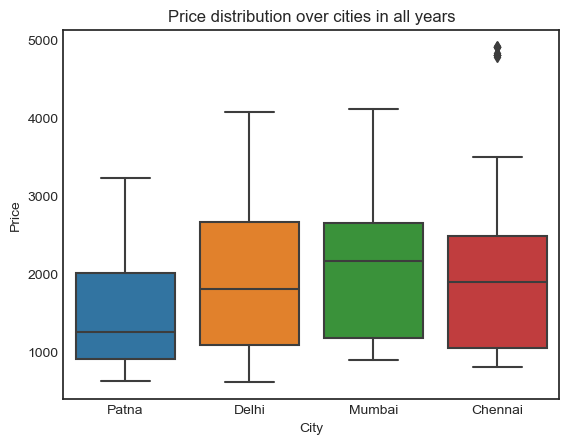

In [15]:
g1 = sns.boxplot(scatter_price[scatter_price.price > 600], x='market', y='price')
g1.set_xticklabels(g1.get_xticklabels())
g1.set(xlabel='City', ylabel='Price', title ='Price distribution over cities in all years');

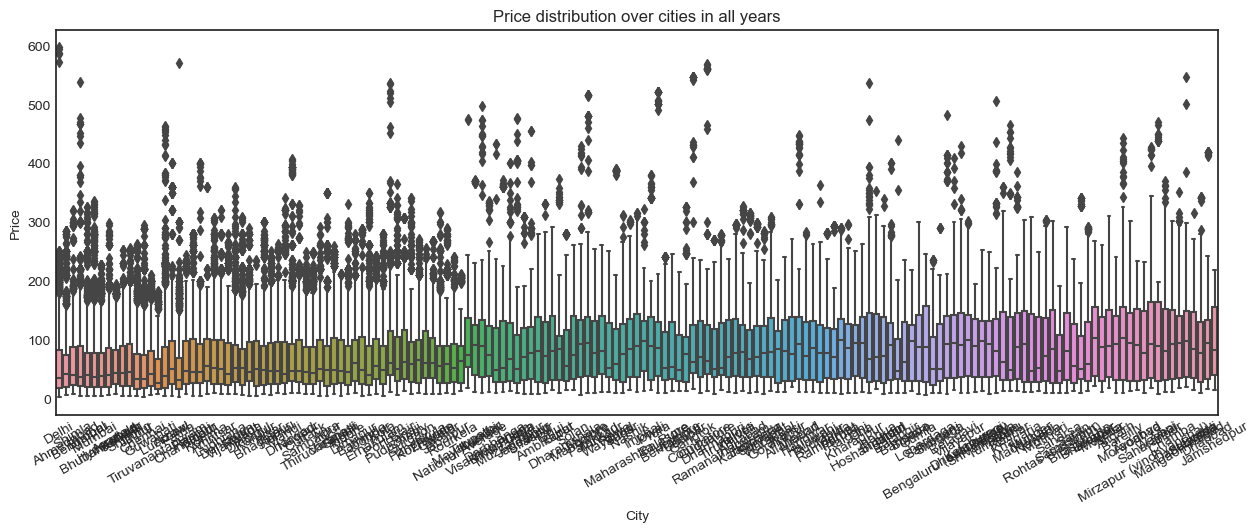

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

g2 = sns.boxplot(scatter_price[scatter_price.price < 600], ax=ax, x='market', y='price')
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
g2.set(xlabel='City', ylabel='Price', title ='Price distribution over cities in all years');

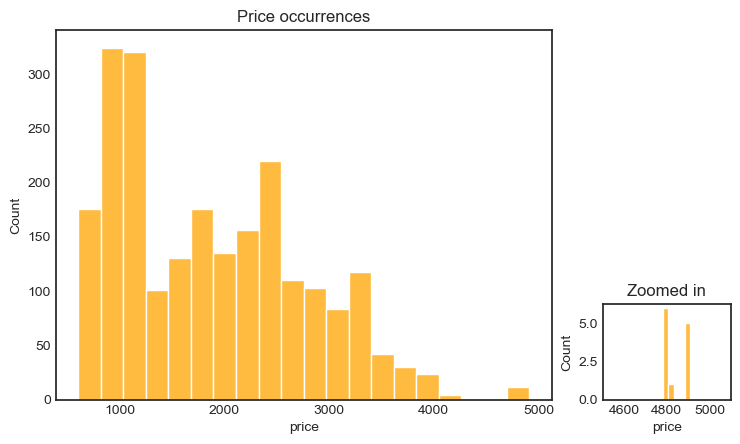

In [17]:
warnings.filterwarnings('ignore')

# Left plot
g1 = sns.histplot(scatter_price[(scatter_price.price > 600)].price, color='orange')
g1.set_title('Price occurrences')

# Right small plot
ax2 = plt.axes([.98, .11, .2, .2], facecolor='white')
sns.histplot(scatter_price[(scatter_price.price >= 4500)].price, ax=ax2, color='orange')
ax2.set_title('Zoomed in')
ax2.set_xlim([4500, 5100]);

### Significant increase in rice prices

In [18]:
df_food.iloc[scatter_price[scatter_price.price >= 4500].id, :]

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
96578,2019-11-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4800.00,67.0391
97681,2019-12-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4800.00,67.7105
98757,2020-01-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4800.00,67.9021
99838,2020-02-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4800.00,67.1141
100925,2020-03-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4800.00,64.8561
101993,2020-04-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4826.09,63.0367
103059,2020-05-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4910.00,64.7586
104104,2020-06-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4900.00,64.4991
105151,2020-07-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4900.00,65.2377
106195,2020-08-15,Tamil Nadu,Chennai,Chennai,13.083333,80.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,INR,4900.00,65.4468


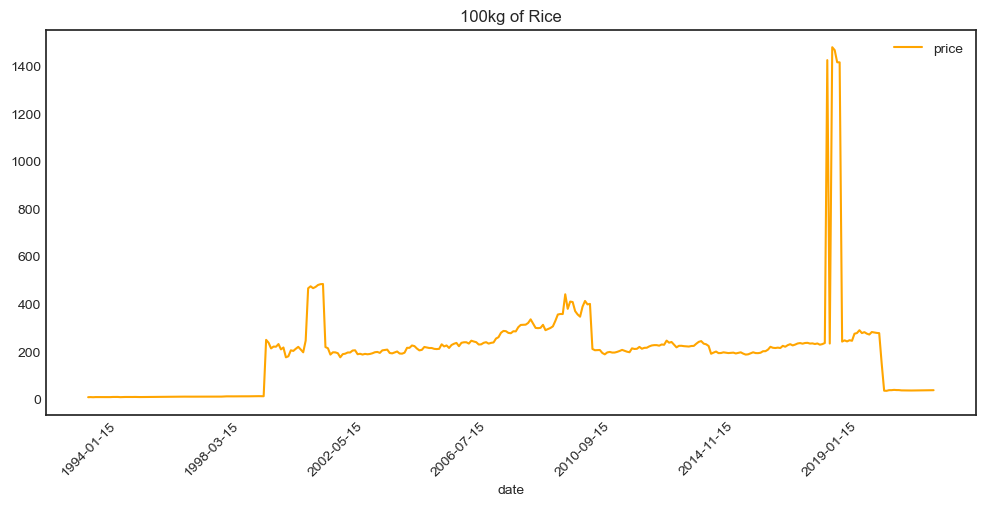

In [61]:
rice_price = df_food[df_food.commodity == 'Rice'][['date', 'price']].set_index('date')
rp_mean = rice_price.groupby('date').mean()
rp_mean.plot(rot=45, title='100kg of Rice', figsize=(12, 5), c='orange');

## Outlier detection

In [4]:
%matplotlib inline

def stat_outliers (col):
    outliers = set()
    m = col.mean()
    s = col.std()
    for p in col.unique():
        if abs(p - m) > 3 * s:
            outliers.add(p)
    return outliers


def lof_outliers(data, threshold, n_neighbors=10):
    # n_neighbors=10
    clf = LocalOutlierFactor(n_neighbors = n_neighbors)
    X = data.reshape(-1, 1)
    clf.fit_predict(X)
    lofOutiers = []
    for cc in range(len(clf.negative_outlier_factor_)):
        if clf.negative_outlier_factor_[cc] < -threshold:
            lofOutiers.append(cc)
    f = plt.figure()
    f.set_figwidth(14)
    f.set_figheight(5)

    plt.plot(data, color='black', marker='o', ms=2, linewidth=0)
    plt.plot(data, markevery = lofOutiers, color='red', marker='s', ms=7, fillstyle='none', linewidth=0, alpha=.5)
    plt.title('Red indicates outlier')
    plt.show();
    outliers = X[lofOutiers]
    return np.unique(outliers)

In [5]:
outliers = stat_outliers(df_food.price)
conditions = df_food.price.apply(lambda x: x in outliers)

records_as_outliers = df_food[conditions]

In [6]:
reformat_index = records_as_outliers.reset_index().set_index('date')[['index', 'price']]

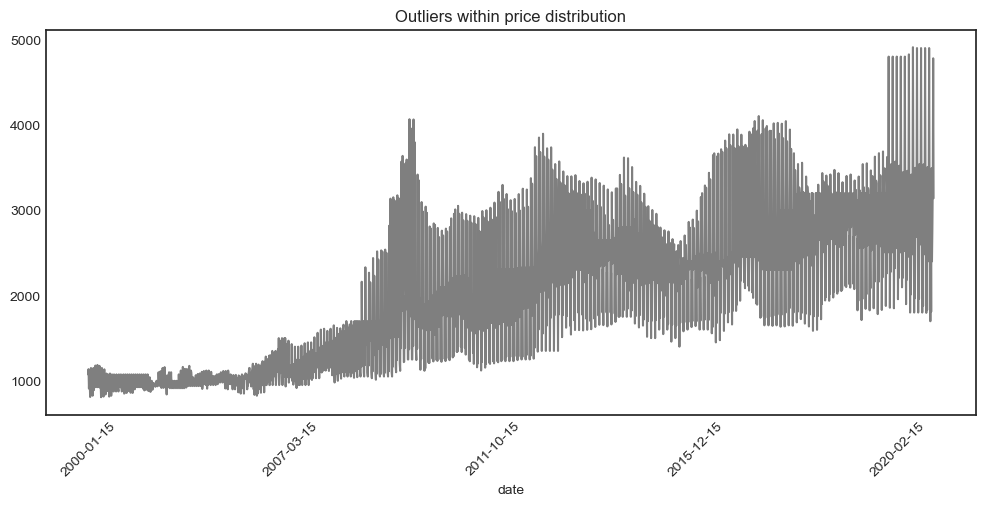

In [7]:
reformat_index['price'].plot.line(rot=45, title='Outliers within price distribution',
                                  figsize=(12, 5), alpha=.5, c='k', fillstyle='none');

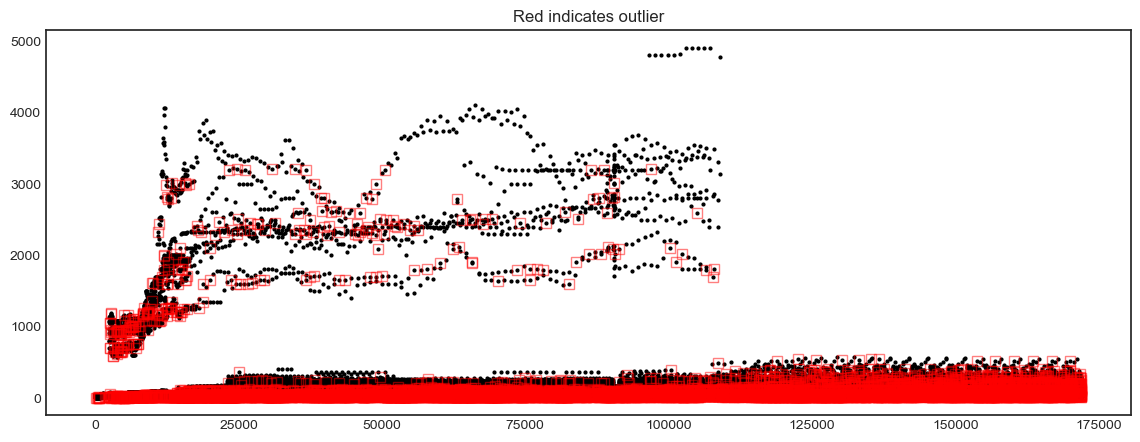

Price has 2616 outliers


In [8]:
outliers = lof_outliers(np.array(df_food.price), 2)
print(f"Price has {len(outliers)} outliers")

In [9]:
df_food['year'] = pd.to_datetime(df_food.date.apply(lambda x: np.datetime64(x, 'M')))
df_food['month'] = pd.to_datetime(df_food.date.apply(lambda x: np.datetime64(x, 'M')))

In [10]:
df_food.year = df_food.year.apply(lambda x: x.year)
df_food.month = df_food.month.apply(lambda x: x.month_name()[:3])

In [11]:
df_prices = df_food[['year', 'month', 'price']].groupby(['year', 'month']).agg(lambda x: x.mean())
df_prices = df_prices.reset_index()
prices = df_prices.pivot('month', 'year', 'price')

/var/folders/bh/hhr2wkwn2ldcpz5w4tgn7sb80000gn/T/ipykernel_53557/2387771781.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  prices = df_prices.pivot('month', 'year', 'price')


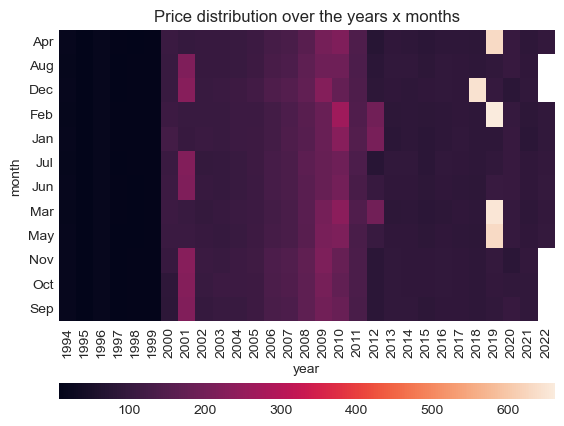

In [12]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .4}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

g1 = sns.heatmap(prices,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"})

g1.set_title('Price distribution over the years x months');

# Forecast - Chickpeas price in Delhi

In [13]:
time_series = df_food.reset_index().set_index('date')
df_chickpeas = time_series[time_series.commodity == 'Chickpeas']

### Geometry

In [17]:
india_geometry = geopandas.GeoDataFrame({
    'market': df_chickpeas['market'],
    'geometry': [Point(x, y) for x, y in zip(df_chickpeas['longitude'], df_chickpeas['latitude'])]
})

In [18]:
overlay_geom = india_map.overlay(india_geometry, how="union", keep_geom_type=False)

Cities: ['Patna' 'Delhi' 'Chennai' nan 'Mumbai']


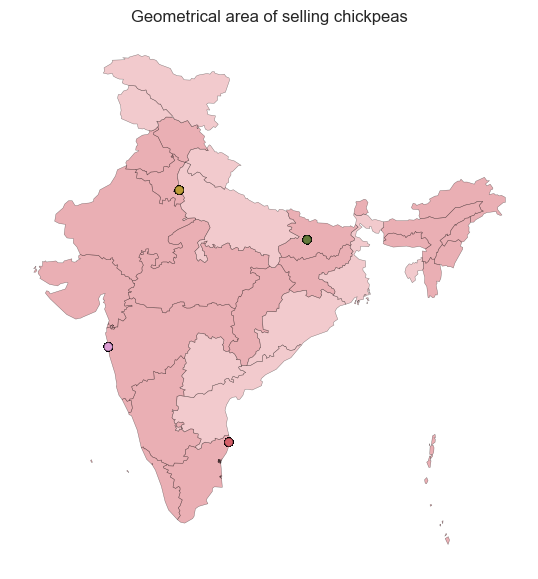

In [21]:
g1 = overlay_geom.plot(cmap='tab20b', edgecolor='k', alpha=0.5, linewidth=.3, figsize=(7,7));
g1.set_title('Geometrical area of selling chickpeas')
g1.set_axis_off()

print(f'Cities: {overlay_geom.market.unique()}')

In [22]:
df_linear_rel = df_chickpeas.reset_index()[['date', 'price']]
df_linear_rel['d'] = df_linear_rel.date.apply(lambda x: dates.datestr2num(x))

In [23]:
def date_formatter(x, pos):
    return dates.num2date(x).strftime('%Y-%m-%d')

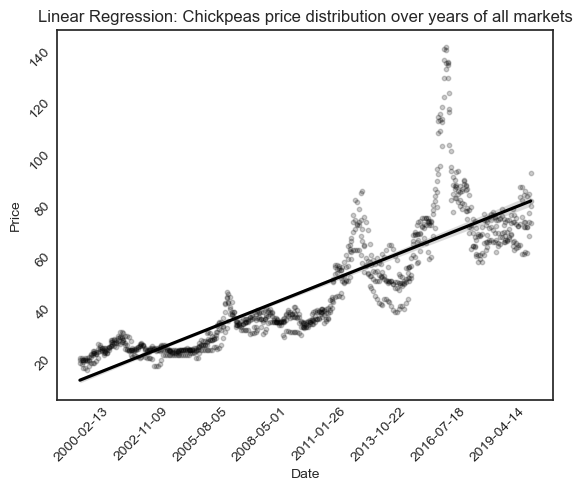

In [25]:
fig, ax = plt.subplots()

g1 = sns.regplot(ax=ax, x="d", y="price", data=df_linear_rel, ci=95, color='k', scatter_kws={'alpha':0.2, 's':10})
g1.set(xlabel='Date', ylabel='Price', title ='Linear Regression: Chickpeas price distribution over years of all markets');

ax.xaxis.set_major_formatter(date_formatter)
ax.tick_params(labelrotation=45)

### Fluctuations

In [26]:
year_mean = df_linear_rel.iloc[:, :2].groupby('date').mean()
year_variance = df_linear_rel.iloc[:, :2].groupby('date').std()

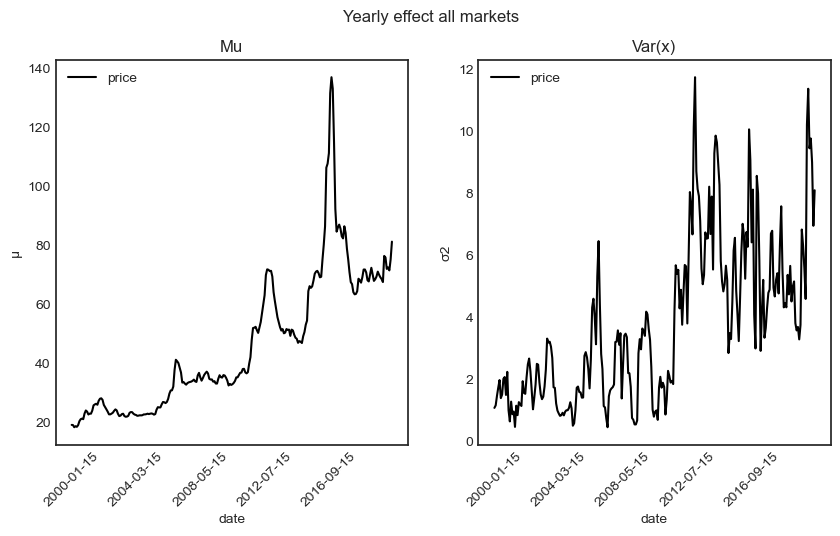

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Yearly effect all markets')

rot=45
color='k'
year_mean.plot(ax=ax[0], rot=rot, title='Mu', ylabel='μ', c=color)
year_variance.plot(ax=ax[1], rot=rot, title='Var(x)', ylabel='σ2', c=color);

### Prepare train and test set for forecasting

In [28]:
df_forecast = df_chickpeas.reset_index()[['date', 'market', 'price']]

In [29]:
df_forecast.market.value_counts()

Delhi      250
Mumbai     250
Chennai    250
Patna      248
Name: market, dtype: int64

Split data by last 5 months, since dates are in months, in train and test set

In [30]:
market = 'Delhi'

df_delhi = df_forecast[df_forecast.market == market]
train = df_delhi[df_delhi.date < '2020-06-15']
test = df_delhi[df_delhi.date >= '2020-06-15']

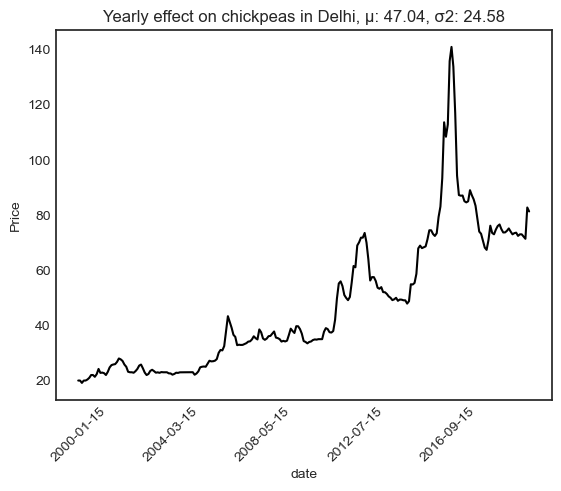

In [31]:
rot=45
color='k'
mu = round(train.price.mean(), 2)
std = round(train.price.std(), 2)
title = f'Yearly effect on chickpeas in Delhi, μ: {mu}, σ2: {std}'
train.set_index('date').price.plot(rot=rot, ylabel='Price', xlabel='date', c=color, title=title);

### Performing demand forecasting using moving average

In [32]:
k = 5
start = len(train) - k
end = len(train)
new_list = train.price.iloc[start:end].tolist()

for _ in test.date:
    # here the window moves by updating the new list and using -k
    windowMA = round(np.mean(new_list[-k:]), 2)
    new_list.append(windowMA)

In [33]:
t = len(test)
MSE = np.mean((new_list[-t:] - test.price)**2)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 21.579819999999973


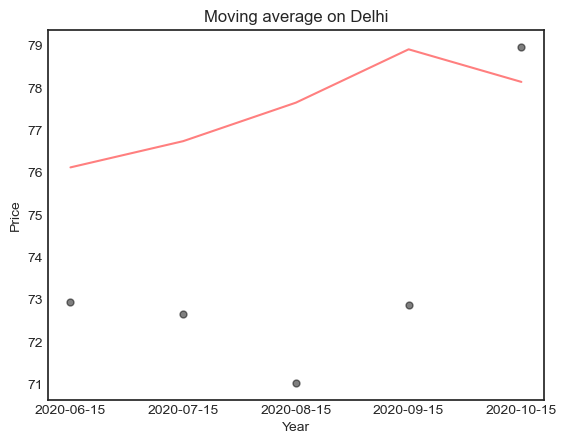

In [34]:
plt.plot(test.date, test.price, 'o', alpha = 0.5, ms=5, color='k')
plt.plot(test.date, new_list[-t:], 'r', alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Moving average on Delhi');

### Performing demand forecasting using Linear Regression

In [188]:
offset = math.floor(len(train) / 2)
train['x'] = train.index - offset

/var/folders/bh/hhr2wkwn2ldcpz5w4tgn7sb80000gn/T/ipykernel_52020/446116595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x'] = train.index - offset


In [189]:
X = train.x.values.reshape(len(train.x), 1)
y = train.price.values.reshape(len(train.price), 1)

In [190]:
model = LinearRegression()

In [191]:
model.fit(X, y)

LinearRegression()

## Prediction

In [192]:
# Print the intercept and the coefficient of the model
a0 = model.intercept_[0]
a1 = model.coef_[0][0]

print(f'Intercept: {a0}, Coefficient: {a1}')

Intercept: 19.63712575431545, Coefficient: 0.07508917082495824


In [202]:
new_list = list()
xi = np.max(train.x) + 1

for _ in test.date:
    # Linear function, obtaining y hat
    yi = a0 + a1 * xi
    new_list.append(yi)
    # Next date
    xi += 1

## Evaluation

In [203]:
MSE = np.mean((new_list - test.price)**2)
R = metrics.r2_score(test.price, new_list)
print( "R^2:", R)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 111.6180102314976


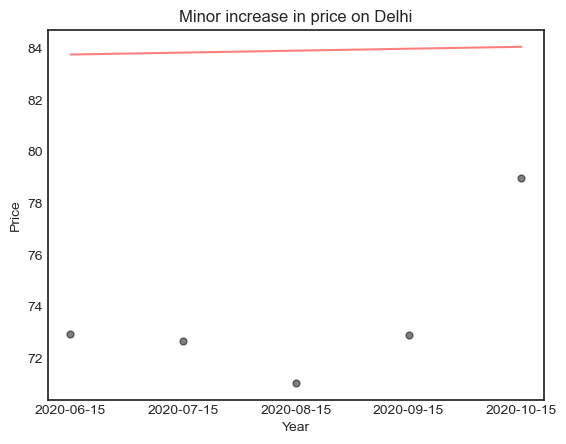

In [204]:
plt.plot(test.date, test.price, 'o', alpha = 0.5, ms=5, color='k')
plt.plot(test.date, new_list, 'r', alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Minor increase in price on Delhi');